In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2

2022-10-23 09:06:56.991414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


/var/folders/gq/0638dkd56bz0jgxmf107d0g00000gn/T/ipykernel_39472/1632852947.py:5: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  vert_img = org_img.transpose(method=Image.FLIP_TOP_BOTTOM)


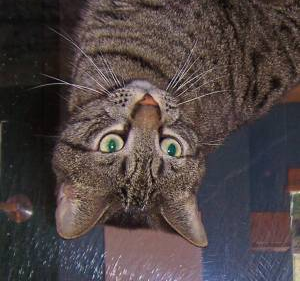

In [3]:
from PIL import Image

org_img = Image.open("PetImages/Cat/1.jpg")

vert_img = org_img.transpose(method=Image.FLIP_TOP_BOTTOM)
vert_img

/var/folders/gq/0638dkd56bz0jgxmf107d0g00000gn/T/ipykernel_39472/2854789363.py:1: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  horz_img = org_img.transpose(method=Image.FLIP_LEFT_RIGHT)


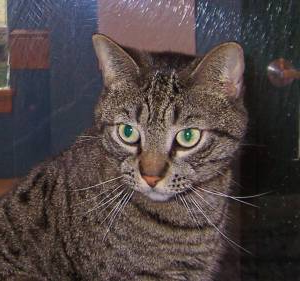

In [4]:
horz_img = org_img.transpose(method=Image.FLIP_LEFT_RIGHT)
horz_img 

In [5]:
org_img.show()
angle = 45
output = org_img.rotate(angle)
output.show()

In [6]:
img1 = org_img.transform((300, 300), Image.Transform.EXTENT, data =[3, 10, 3 + org_img.width//2, org_img.height//2 ])
img1.show()


# classification

In [7]:
import os
train_dir = "PetImages/train"
test_dir = "PetImages/test"


In [8]:
train_datagen = ImageDataGenerator(rescale=(1/255.),shear_range = 0.2,zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory(directory = train_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")
test_datagen = ImageDataGenerator(rescale=(1/255.))
test_set = test_datagen.flow_from_directory(directory = test_dir,target_size=(64,64),
                                                batch_size=32,
                                                class_mode = "binary")

Found 162 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [9]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3))
model.add(MaxPool2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))

#Output layer
model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

2022-10-23 09:07:09.704135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
model.compile(optimizer = "adam", loss = "hinge", metrics = ['accuracy'])

In [ ]:
history = model.fit(x = training_set, validation_data = test_set, epochs=15)

In [ ]:
y_pred = model.predict(test_set)
y_pred

In [ ]:
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

In [26]:
from keras.optimizers import RMSprop 
model.compile(loss='mse', optimizer='nadam',metrics = ['accuracy'])

In [ ]:
history = model.fit(x = training_set, validation_data = test_set, epochs=15)

Epoch 1/15
6/6 [==============================] - 1s 126ms/step - loss: 0.2290 - accuracy: 0.6481 - val_loss: 0.2457 - val_accuracy: 0.5750
Epoch 2/15
6/6 [==============================] - 1s 96ms/step - loss: 0.2696 - accuracy: 0.5432 - val_loss: 0.2487 - val_accuracy: 0.5500
Epoch 3/15
6/6 [==============================] - 1s 97ms/step - loss: 0.2447 - accuracy: 0.5432 - val_loss: 0.2505 - val_accuracy: 0.5500
Epoch 4/15
6/6 [==============================] - 1s 97ms/step - loss: 0.2526 - accuracy: 0.5432 - val_loss: 0.2488 - val_accuracy: 0.6500
Epoch 5/15
6/6 [==============================] - 1s 103ms/step - loss: 0.2322 - accuracy: 0.6049 - val_loss: 0.3023 - val_accuracy: 0.4750
Epoch 6/15


In [ ]:
plt.plot(history.history['accuracy'], label='acc', color='red')
plt.plot(history.history['val_accuracy'], label='val_acc', color='green')
plt.legend()